In [6]:
from epimodel import EpidemiologicalParameters, DefaultModel, preprocess_data

import numpy as np
import pymc3 as pm

In [7]:
data = preprocess_data('../double-entry-data/double_entry_final.csv', last_day='2020-05-30', smoothing=1)
data.mask_reopenings(print_out = False)

Dropping NPI Travel Screen/Quarantine
Dropping NPI Travel Bans
Dropping NPI Public Transport Limited
Dropping NPI Internal Movement Limited
Dropping NPI Public Information Campaigns
Dropping NPI Symptomatic Testing
Masking invalid values


In [8]:
ep = EpidemiologicalParameters()

In [9]:
bd = ep.get_model_build_dict()

In [10]:
bd

{'gi_mean_mean': 5.06,
 'gi_mean_sd': 0.3265,
 'gi_sd_mean': 2.11,
 'gi_sd_sd': 0.5,
 'deaths_delay_mean_mean': 21.819649695284962,
 'deaths_delay_mean_sd': 1.0056755718977664,
 'deaths_delay_disp_mean': 14.26238141720708,
 'deaths_delay_disp_sd': 5.177442947725441,
 'cases_delay_mean_mean': 10.92830227448381,
 'cases_delay_mean_sd': 0.9387435298564465,
 'cases_delay_disp_mean': 5.406593726647138,
 'cases_delay_disp_sd': 0.2689502951493133}

In [11]:
with DefaultModel(data) as model:
    model.build_model(**bd)

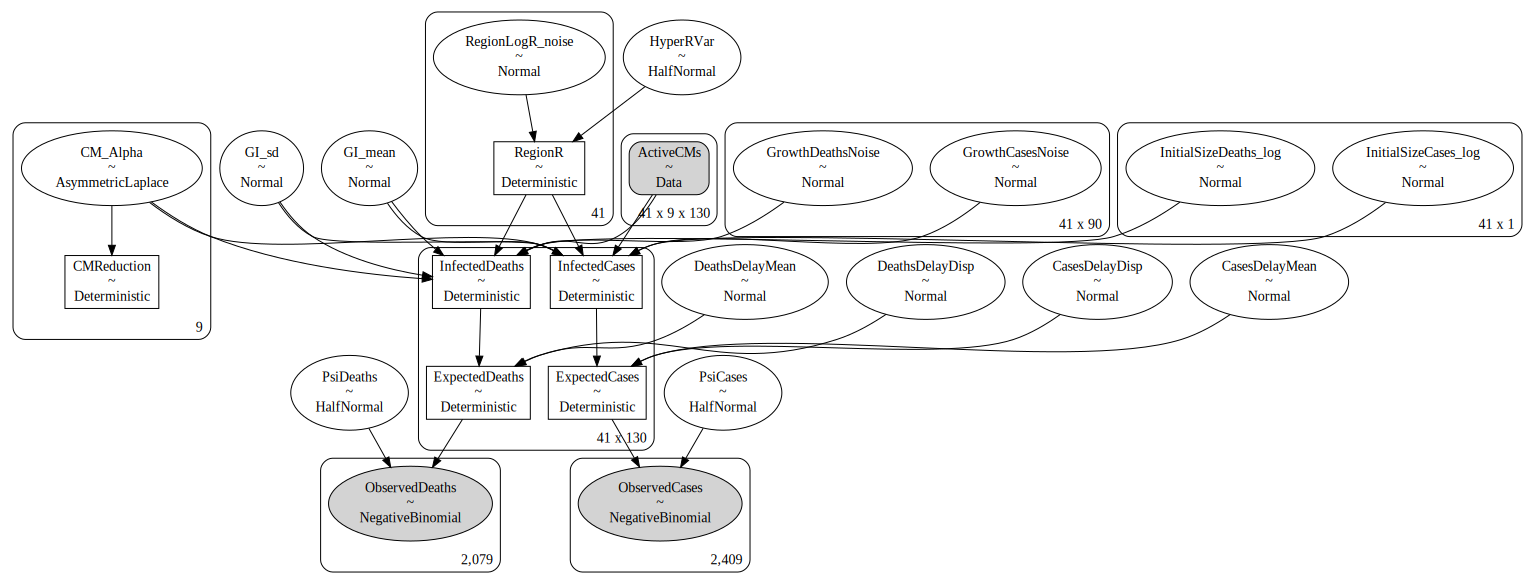

In [12]:
pm.model_to_graphviz(model)

In [13]:
with model:
    model.trace = pm.sample(2000, tune=500, cores=4, chains=4, max_treedepth=12, target_accept=0.925)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [DeathsDelayDisp, DeathsDelayMean, InitialSizeDeaths_log, CasesDelayDisp, CasesDelayMean, InitialSizeCases_log, PsiDeaths, PsiCases, GrowthDeathsNoise, GrowthCasesNoise, GI_sd, GI_mean, RegionLogR_noise, HyperRVar, CM_Alpha]


Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 13501 seconds.


In [14]:
# save results in a pickle file
import pickle
pickle.dump(model.trace, open('traces/final_results.pkl', 'wb'))

In [20]:
import arviz as az

In [ ]:
np.mean(model.trace['GI_sd'] < 0.7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13bf13af0>,
      dtype=object)

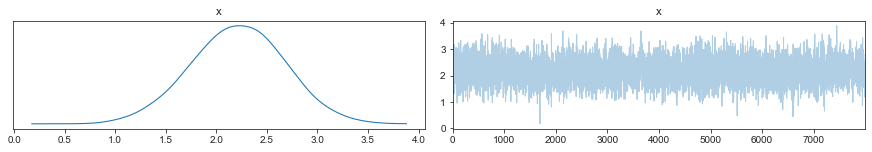

In [21]:
az.plot_trace(model.trace['GI_sd'])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(model.trace['GI_sd'])

In [19]:
np.mean(model.trace['GI_mean'])

5.120487983807792

In [18]:
np.mean(model.trace['GI_sd'])

2.2025706950356754